# Universidad del Valle de Guatemala
# Data Science 
# Proyecto 2
> ### Jennifer Sandoval 18962
> ### Luis Quezada 18028
> ### Esteban del Valle 18221

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from basic_image_eda import BasicImageEDA

> # Limpieza de Datos

In [2]:
test_clean = pd.read_csv('boneage-test-dataset.csv')
test_clean.rename(columns={'Case ID':'id'}, inplace=True)
test_clean.rename(columns={'Sex':'sex'}, inplace=True)
test_clean.loc[test_clean['sex'] == "F", 'sex'] = 0
test_clean.loc[test_clean['sex'] == "M", 'sex'] = 1
test_clean.dropna()
test_clean

,id,sex
0,4360,1
1,4361,1
2,4362,1
3,4363,1
4,4364,1
...,...,...
195,4555,0
196,4556,0
197,4557,0
198,4558,0


In [3]:
train_clean = pd.read_csv('boneage-training-dataset.csv')
train_clean = train_clean[['id','male','boneage']]

train_clean.loc[train_clean['male'] == False, 'sex'] = 0
train_clean.loc[train_clean['male'] == True, 'sex'] = 1
train_clean = train_clean[['id','sex','boneage']]
train_clean.dropna()
train_clean

,id,sex,boneage
0,1377,0.0,180
1,1378,0.0,12
2,1379,0.0,94
3,1380,1.0,120
4,1381,0.0,82
...,...,...,...
12606,15605,0.0,50
12607,15606,0.0,113
12608,15608,0.0,55
12609,15609,1.0,150


> # EDA de datos

In [4]:
train_clean.describe()

,id,sex,boneage
count,12611.000000,12611.000000,12611.000000
mean,8537.653001,0.541829,127.320752
std,4108.763993,0.498267,41.182021
min,1377.000000,0.000000,1.000000
25%,5074.500000,0.000000,96.000000
50%,8565.000000,1.000000,132.000000
75%,12091.500000,1.000000,156.000000
max,15610.000000,1.000000,228.000000


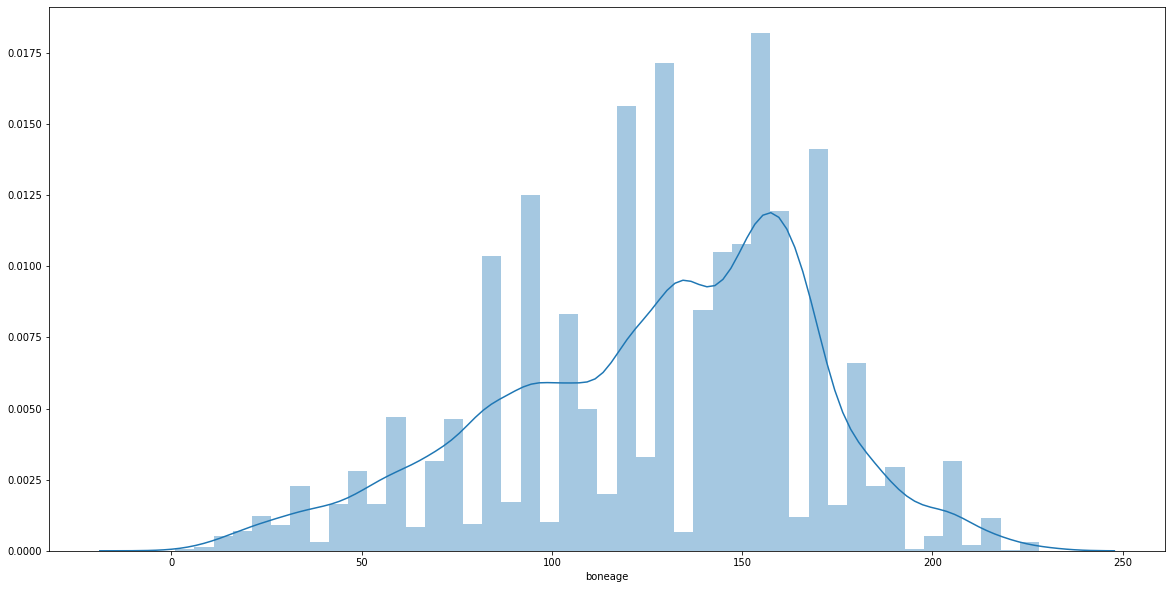

In [5]:
d = train_clean['boneage']
plt.figure(figsize=(20,10))
sns.distplot(d)

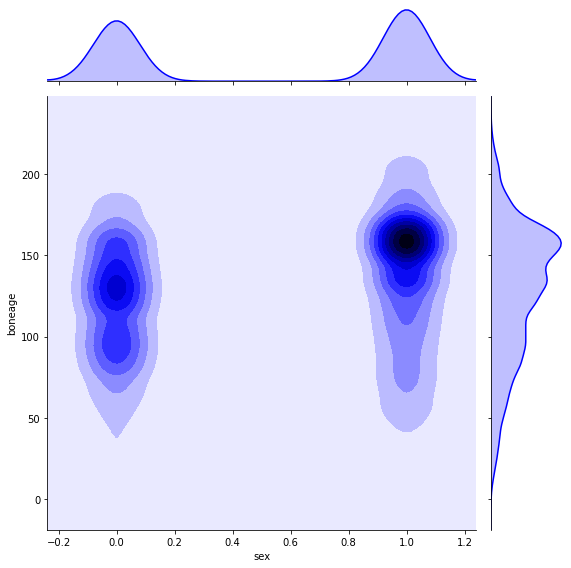

In [6]:
sns.jointplot(x='sex', y='boneage',data=train_clean, kind="kde",color='blue',height=8)

[Text(0, 0, '0.0'), Text(0, 0, '1.0')]

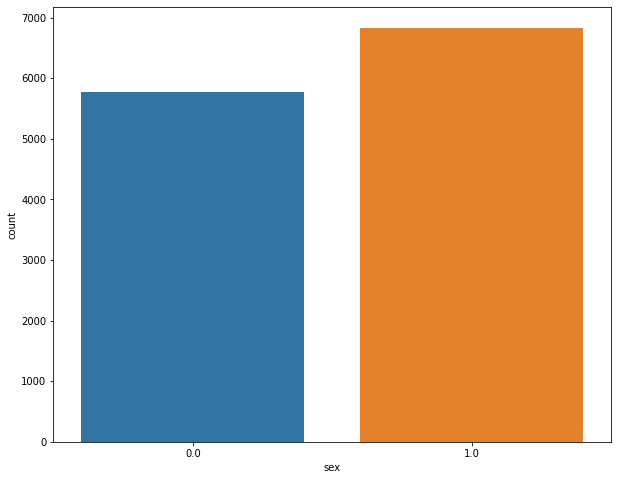

In [7]:
plt.figure(figsize=(10,8))
chart = sns.countplot(x='sex',data=train_clean)
chart.set_xticklabels(chart.get_xticklabels())

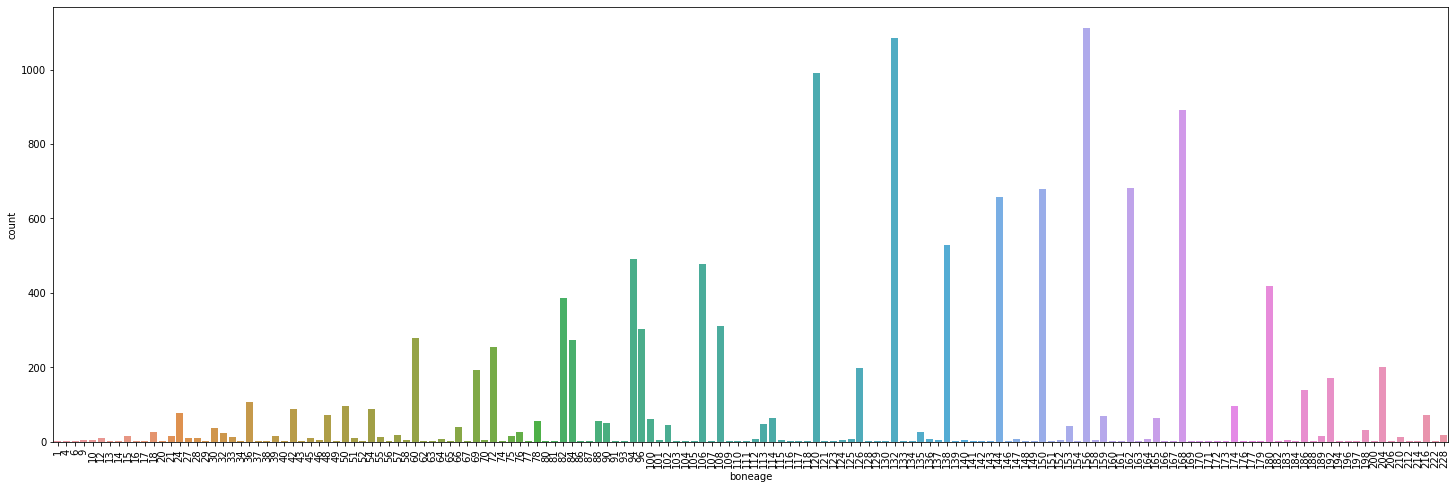

In [8]:
plt.figure(figsize=(25,8))
chart = sns.countplot(x='boneage',data=train_clean)
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


> # EDA de imagenes

#### Para llevar a cabo el analisis exploratorio de imagenes se utilizó una herramienta (basic-image-eda) que permite el análisis de las caracteristicas principales de las imágenes. (S. Yang, P. Luo, C. C. Loy y  X. Tang, 2015).


found 12611 images.


  0%|          | 0/12611 [00:00<?, ?it/s]

Using 16 threads. (max:16)



100%|██████████| 12611/12611 [00:46<00:00, 274.04it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  12611

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  640
max height                               |  2989
mean height                              |  1664.247878835937
median height                            |  1624

min width                                |  521
max width                                |  3001
mean width                               |  1319.3485052731742
median width                             |  1277

mean height/width ratio                  |  1.2614164280205484
median height/width ratio                |  1.2717306186374315
recommended input size(by mean)          |  [1664 1320] (h x w, multiples of 8)
recommended input size(by mean)          |  [1664 1312] (h x w, multiples of 16)
re

  0%|          | 0/12611 [00:00<?, ?it/s]

Using 16 threads. (max:16)



100%|██████████| 12611/12611 [04:05<00:00, 51.40it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  12611

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['png']

min height                               |  640
max height                               |  2989
mean height                              |  1664.247878835937
median height                            |  1624

min width                                |  521
max width                                |  3001
mean width                               |  1319.3485052731742
median width                             |  1277

mean height/width ratio                  |  1.2614164280205484
median height/width ratio                |  1.2717306186374315
recommended input size(by mean)          |  [1664 1320] (h x w, multiples of 8)
recommended input size(by mean)          |  [1664 1312] (h x w, multiples of 16)
re

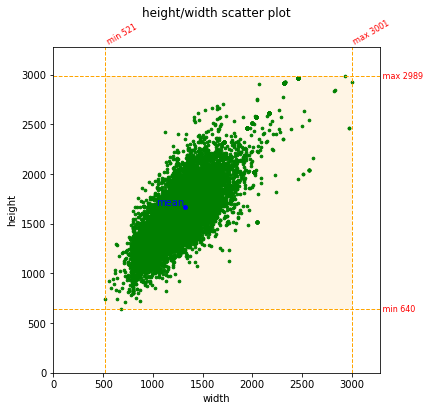

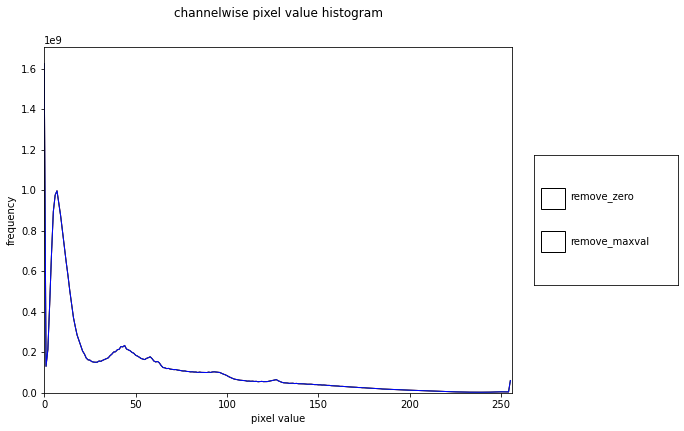

In [10]:

if __name__ == "__main__":  # for multiprocessing
    data_dir = "boneage-training-dataset"
    BasicImageEDA.explore(data_dir)

    # or

    extensions = ['png']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0

    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

> # Predicción de Boneage con CNN

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras import regularizers

In [5]:
train = train_clean[:12000]
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('boneage-training-dataset/'+ str(train['id'][i])+'.png', target_size=(128,128,1), color_mode='grayscale',)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 12000/12000 [06:28<00:00, 30.90it/s]


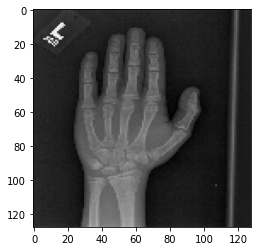

In [6]:
pixels = X[3].reshape((128,128))
plt.imshow(pixels, cmap='gray')
plt.show()

In [7]:
y = train['boneage'].values
#y = to_categorical(y)
y.shape

(12000,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

> ### Modelo 1

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [20]:
model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 17s 694ms/step - loss: 7228.1704 - val_loss: 2050.7302
Epoch 2/20
25/25 [==============================] - 17s 696ms/step - loss: 2791.6213 - val_loss: 1970.9667
Epoch 3/20
25/25 [==============================] - 18s 719ms/step - loss: 2688.7559 - val_loss: 2095.6143
Epoch 4/20
25/25 [==============================] - 19s 742ms/step - loss: 2518.8481 - val_loss: 2218.5461
Epoch 5/20
25/25 [==============================] - 19s 741ms/step - loss: 2294.1431 - val_loss: 2023.3901
Epoch 6/20
25/25 [==============================] - 18s 722ms/step - loss: 2422.6370 - val_loss: 1853.9712
Epoch 7/20
25/25 [==============================] - 17s 695ms/step - loss: 2424.2329 - val_loss: 1887.4097
Epoch 8/20
25/25 [==============================] - 18s 713ms/step - loss: 2118.0957 - val_loss: 1912.9860
Epoch 9/20
25/25 [==============================] - 17s 700ms/step - loss: 2244.1907 - val_loss: 1921.1229
Epoch 10/20
25/25 [==================

Text(0, 0.5, 'Loss')

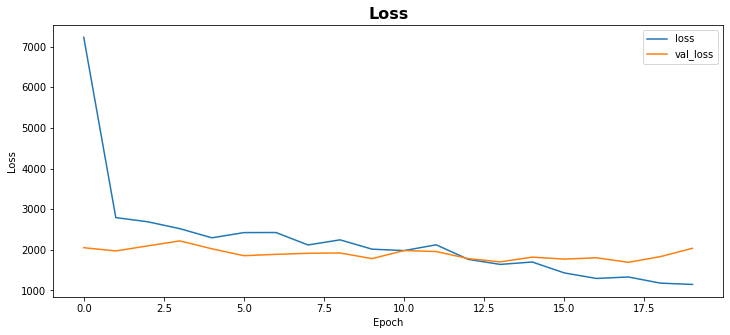

In [21]:
# Visualize results
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [22]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2036.0378147888912

In [23]:
model.save('model1.h5')

> ### Modelo 2

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 17s 665ms/step - loss: 8169.3433 - val_loss: 2096.9690
Epoch 2/20
25/25 [==============================] - 17s 669ms/step - loss: 3287.7273 - val_loss: 1962.0887
Epoch 3/20
25/25 [==============================] - 17s 666ms/step - loss: 2955.0037 - val_loss: 2016.6328
Epoch 4/20
25/25 [==============================] - 17s 670ms/step - loss: 2852.4663 - val_loss: 2113.4080
Epoch 5/20
25/25 [==============================] - 17s 670ms/step - loss: 2920.7195 - val_loss: 2002.8773
Epoch 6/20
25/25 [==============================] - 17s 668ms/step - loss: 2524.3115 - val_loss: 2069.1301
Epoch 7/20
25/25 [==============================] - 17s 681ms/step - loss: 2727.5154 - val_loss: 2064.8630
Epoch 8/20
25/25 [==============================] - 18s 702ms/step - loss: 2536.0183 - val_loss: 2135.4460
Epoch 9/20
25/25 [==============================] - 18s 705ms/step - loss: 2460.8408 - val_loss: 2036.5342
Epoch 10/20
25/25 [==================

Text(0, 0.5, 'Loss')

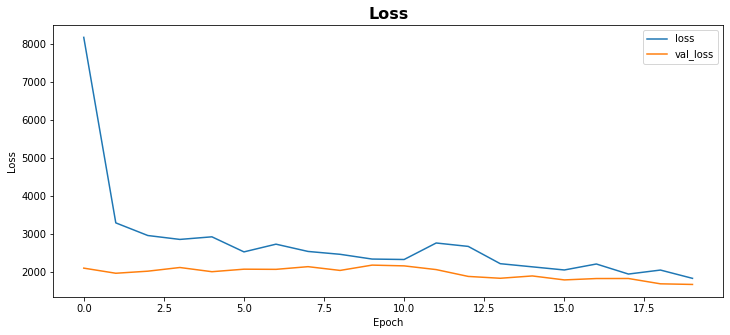

In [25]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [26]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1667.6298391139894

In [27]:
model.save('model2.h5')

> ### Modelo 3

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
25/25 [==============================] - 25s 983ms/step - loss: 7936.3008 - val_loss: 2509.8474
Epoch 2/40
25/25 [==============================] - 24s 953ms/step - loss: 3791.8005 - val_loss: 1984.7753
Epoch 3/40
25/25 [==============================] - 23s 924ms/step - loss: 3291.2490 - val_loss: 1944.1559
Epoch 4/40
25/25 [==============================] - 23s 918ms/step - loss: 3091.9800 - val_loss: 2627.9441
Epoch 5/40
25/25 [==============================] - 23s 920ms/step - loss: 2872.7612 - val_loss: 2078.1201
Epoch 6/40
25/25 [==============================] - 23s 926ms/step - loss: 2958.8281 - val_loss: 1877.1477
Epoch 7/40
25/25 [==============================] - 23s 914ms/step - loss: 2597.2500 - val_loss: 1880.1622
Epoch 8/40
25/25 [==============================] - 23s 915ms/step - loss: 2438.6130 - val_loss: 1894.7706
Epoch 9/40
25/25 [==============================] - 23s 934ms/step - loss: 2406.8948 - val_loss: 1891.7756
Epoch 10/40
25/25 [==================

Text(0, 0.5, 'Loss')

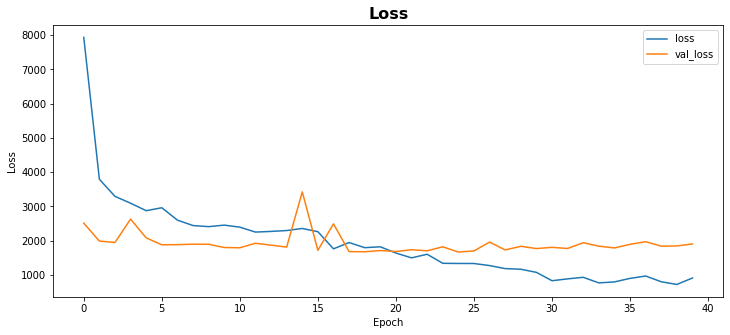

In [29]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [30]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1900.9288321929437

In [31]:
model.save('model3.h5')

> ### Modelo 4

In [32]:
from keras import regularizers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
25/25 [==============================] - 32s 1s/step - loss: 6520.7417 - val_loss: 2010.1166
Epoch 2/40
25/25 [==============================] - 31s 1s/step - loss: 2836.7803 - val_loss: 2534.7476
Epoch 3/40
25/25 [==============================] - 30s 1s/step - loss: 2680.9299 - val_loss: 1940.7645
Epoch 4/40
25/25 [==============================] - 30s 1s/step - loss: 2444.5466 - val_loss: 1851.6730
Epoch 5/40
25/25 [==============================] - 30s 1s/step - loss: 2197.4573 - val_loss: 1987.2686
Epoch 6/40
25/25 [==============================] - 30s 1s/step - loss: 2018.4019 - val_loss: 1808.3475
Epoch 7/40
25/25 [==============================] - 31s 1s/step - loss: 2002.6608 - val_loss: 1976.4575
Epoch 8/40
25/25 [==============================] - 31s 1s/step - loss: 1893.6787 - val_loss: 2126.9092
Epoch 9/40
25/25 [==============================] - 32s 1s/step - loss: 2300.5991 - val_loss: 1771.0480
Epoch 10/40
25/25 [==============================] - 32s 1s/step

Text(0, 0.5, 'Loss')

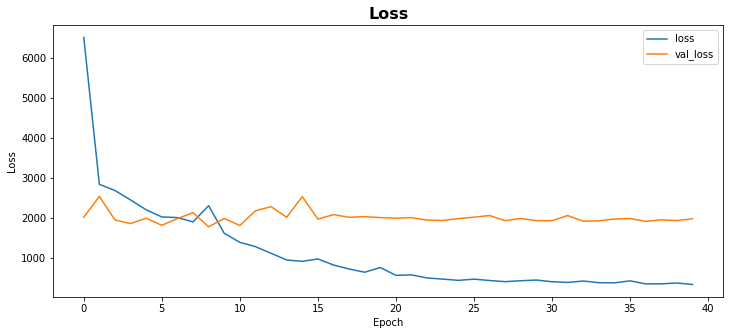

In [33]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [34]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1861.3403970382808

In [35]:
model.save('model4.h5')

> ### Model 5

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
25/25 [==============================] - 17s 683ms/step - loss: 6539.1211 - val_loss: 2187.1233
Epoch 2/40
25/25 [==============================] - 17s 661ms/step - loss: 3861.7766 - val_loss: 1941.5032
Epoch 3/40
25/25 [==============================] - 17s 665ms/step - loss: 2898.0908 - val_loss: 2087.4353
Epoch 4/40
25/25 [==============================] - 17s 675ms/step - loss: 2836.4941 - val_loss: 2086.3540
Epoch 5/40
25/25 [==============================] - 17s 669ms/step - loss: 3014.6672 - val_loss: 1845.5903
Epoch 6/40
25/25 [==============================] - 17s 671ms/step - loss: 2710.9431 - val_loss: 1843.4066
Epoch 7/40
25/25 [==============================] - 17s 695ms/step - loss: 2563.6086 - val_loss: 1940.3875
Epoch 8/40
25/25 [==============================] - 17s 687ms/step - loss: 2622.7380 - val_loss: 2298.9744
Epoch 9/40
25/25 [==============================] - 18s 703ms/step - loss: 2604.8193 - val_loss: 2158.9709
Epoch 10/40
25/25 [==================

Text(0, 0.5, 'Loss')

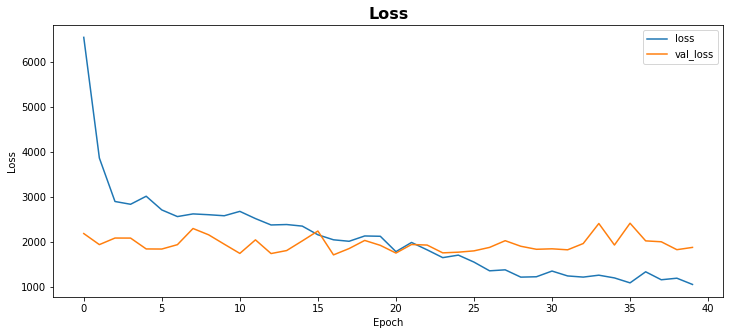

In [21]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [23]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1879.8240024446789

> ### Modelo 6

In [13]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(7, 7),strides=(2,2),activation='relu',input_shape=(128,128,1)))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(5, 5),strides=(2,2),activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(2,2),activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3),strides=(2,2),activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
300/300 [==============================] - 24s 80ms/step - loss: 2708.7112 - val_loss: 1794.5425
Epoch 2/30
300/300 [==============================] - 24s 79ms/step - loss: 1831.9623 - val_loss: 1881.6929
Epoch 3/30
300/300 [==============================] - 24s 81ms/step - loss: 1813.1191 - val_loss: 1656.9606
Epoch 4/30
300/300 [==============================] - 25s 84ms/step - loss: 1653.0656 - val_loss: 1744.9349
Epoch 5/30
300/300 [==============================] - 25s 82ms/step - loss: 1600.4103 - val_loss: 1538.3872
Epoch 6/30
300/300 [==============================] - 24s 81ms/step - loss: 1560.6229 - val_loss: 1921.3611
Epoch 7/30
300/300 [==============================] - 25s 83ms/step - loss: 1504.1964 - val_loss: 1408.8022
Epoch 8/30
300/300 [==============================] - 25s 82ms/step - loss: 1413.6040 - val_loss: 1320.0062
Epoch 9/30
300/300 [==============================] - 25s 83ms/step - loss: 1388.7063 - val_loss: 1267.8403
Epoch 10/30
300/300 [=======

Text(0, 0.5, 'Loss')

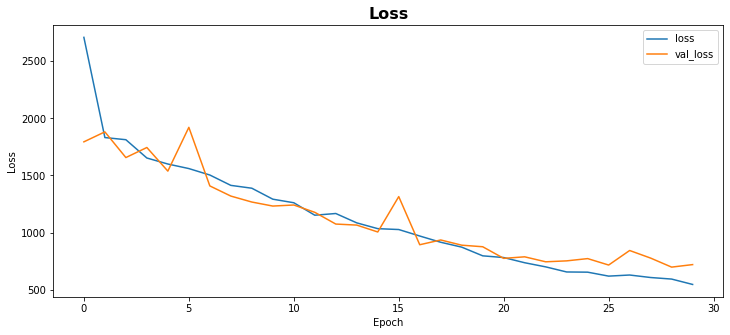

In [14]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

720.3840252032746

In [17]:
model.save('finalModel.h5')

> ### Modelo 7

In [43]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(7, 7),strides=(2,2),activation='relu',input_shape=(128,128,1)))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(5, 5),strides=(2,2),activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(2,2),activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3),strides=(2,2),activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
300/300 [==============================] - 25s 82ms/step - loss: 2748.5908 - val_loss: 1735.5701
Epoch 2/30
300/300 [==============================] - 24s 81ms/step - loss: 1819.6866 - val_loss: 1699.4554
Epoch 3/30
300/300 [==============================] - 24s 80ms/step - loss: 1808.1100 - val_loss: 1720.8524
Epoch 4/30
300/300 [==============================] - 24s 80ms/step - loss: 1798.6633 - val_loss: 1658.9440
Epoch 5/30
300/300 [==============================] - 24s 80ms/step - loss: 1697.1786 - val_loss: 1622.2457
Epoch 6/30
300/300 [==============================] - 24s 80ms/step - loss: 1676.6395 - val_loss: 1631.9016
Epoch 7/30
300/300 [==============================] - 24s 82ms/step - loss: 1661.0881 - val_loss: 1550.2043
Epoch 8/30
300/300 [==============================] - 25s 84ms/step - loss: 1609.9478 - val_loss: 2058.0112
Epoch 9/30
300/300 [==============================] - 25s 84ms/step - loss: 1556.2611 - val_loss: 1521.8527
Epoch 10/30
300/300 [=======

Text(0, 0.5, 'Loss')

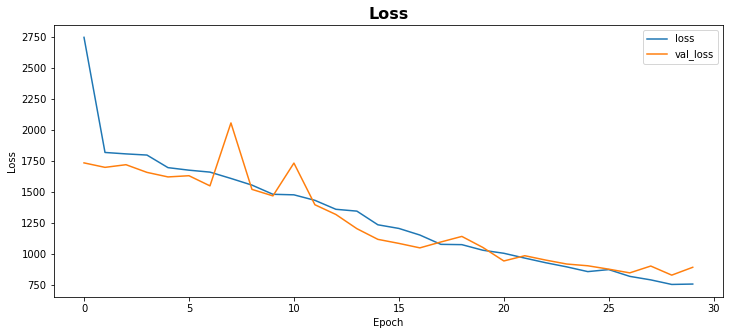

In [44]:
history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,5))
plt.title("Loss", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [45]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

892.9965686761947

> # Predicción de Test dataset con el Modelo 6 (mejor)

In [23]:
test = test_clean[:100]
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('boneage-test-dataset/'+str(test['id'][i])+'.png', target_size=(128,128,1), color_mode='grayscale')
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 100/100 [00:02<00:00, 37.41it/s]


> # Visualización de Predicciones Modelo 6

In [9]:
from keras.models import load_model
predModel = load_model('finalModel.h5')

In [26]:
prediction = model.predict(test)
prediction

array([[146.65662 ],
       [130.89206 ],
       [ 32.74474 ],
       [137.98631 ],
       [135.13925 ],
       [ 71.30743 ],
       [152.02953 ],
       [121.03968 ],
       [142.30606 ],
       [187.3793  ],
       [157.49799 ],
       [127.443596],
       [158.47604 ],
       [146.61935 ],
       [142.15404 ],
       [123.075874],
       [146.69061 ],
       [157.00375 ],
       [ 85.01742 ],
       [164.43242 ],
       [158.51727 ],
       [112.91212 ],
       [121.98678 ],
       [139.0027  ],
       [170.27837 ],
       [ 93.17608 ],
       [ 69.89256 ],
       [118.91869 ],
       [ 49.261738],
       [ 21.345306],
       [171.1149  ],
       [142.43161 ],
       [162.73125 ],
       [ 80.48319 ],
       [138.28357 ],
       [130.74376 ],
       [ 66.97611 ],
       [151.44109 ],
       [ 93.17803 ],
       [153.85822 ],
       [126.820335],
       [150.08975 ],
       [ 82.908844],
       [151.60919 ],
       [138.0894  ],
       [163.71722 ],
       [146.36183 ],
       [ 78.7

In [27]:
y_pred = predModel.predict(X_test)

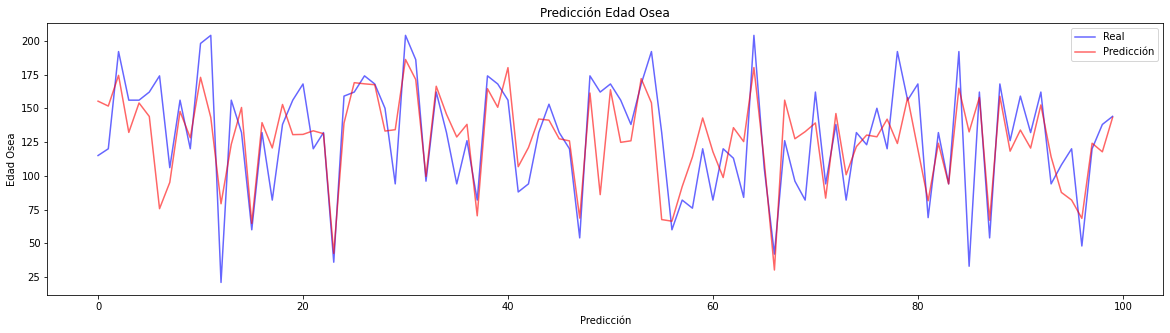

In [47]:
amount = 100
plt.figure(figsize=(20,5))
plt.plot(range(amount), y_test[:amount],'b',label='Real',alpha=0.6)
plt.plot(range(amount), y_pred[:amount],c='r',label='Predicción',alpha=0.6)
plt.title('Predicción Edad Osea')
plt.xlabel('Predicción')
plt.ylabel('Edad Osea')
plt.legend()
plt.show()

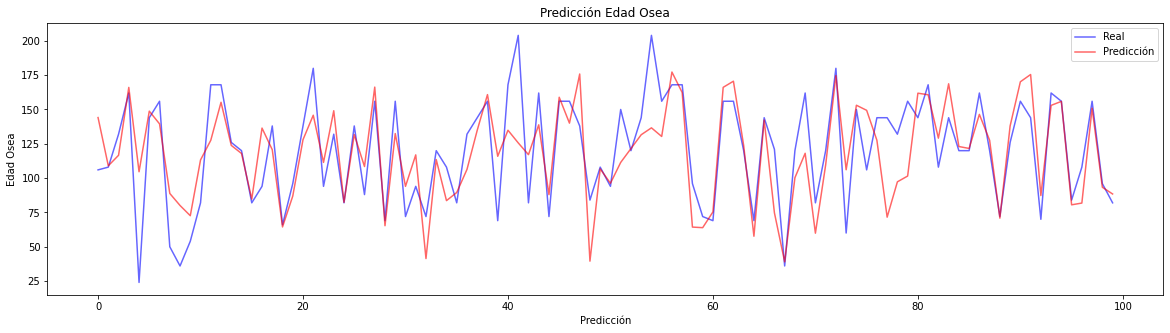

In [48]:
plt.figure(figsize=(20,5))
plt.plot(range(100), y_test[100:200],'b',label='Real',alpha=0.6)
plt.plot(range(100), y_pred[100:200],c='r',label='Predicción',alpha=0.6)
plt.title('Predicción Edad Osea')
plt.xlabel('Predicción')
plt.ylabel('Edad Osea')
plt.legend()
plt.show()

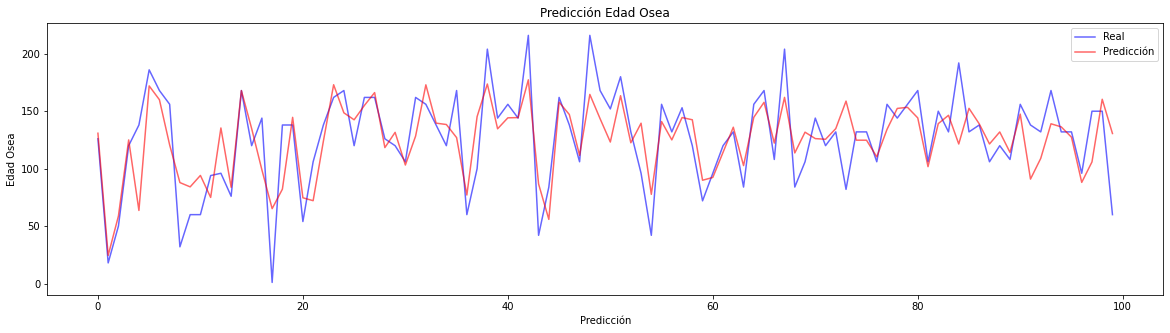

In [49]:
plt.figure(figsize=(20,5))
plt.plot(range(100), y_test[200:300],'b',label='Real',alpha=0.6)
plt.plot(range(100), y_pred[200:300],c='r',label='Predicción',alpha=0.6)
plt.title('Predicción Edad Osea')
plt.xlabel('Predicción')
plt.ylabel('Edad Osea')
plt.legend()
plt.show()

> ### Ejemplos Visuales

In [85]:
t = 10
trainV = train_clean[:t]
train_imageV = []
for i in tqdm(range(trainV.shape[0])):
    img = image.load_img('boneage-training-dataset/'+ str(trainV['id'][i])+'.png', target_size=(128,128,1), color_mode='grayscale',)
    img = image.img_to_array(img)
    img = img/255
    train_imageV.append(img)
XV = np.array(train_imageV)

100%|██████████| 10/10 [00:00<00:00, 24.29it/s]


In [86]:
y_predV = predModel.predict(XV)

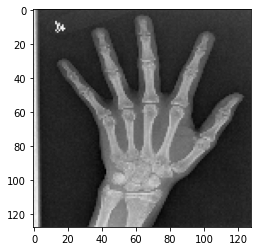

Real: 15.0 
Pred: 15.701118469238281


In [87]:
n = 0
pixels = XV[n].reshape((128,128))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Real:',train_clean[:t]['boneage'][n]/12,'\nPred:',float(y_predV[n])/12)

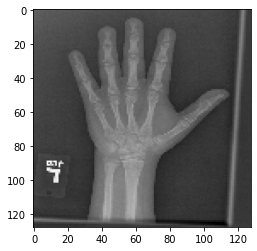

Real: 11.5 
Pred: 11.926139831542969


In [89]:
n = 5
pixels = XV[n].reshape((128,128))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Real:',train_clean[:t]['boneage'][n]/12,'\nPred:',float(y_predV[n])/12)

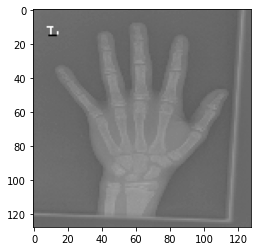

Real: 12.5 
Pred: 12.742500305175781


In [93]:
n = 6
pixels = XV[n].reshape((128,128))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Real:',train_clean[:t]['boneage'][n]/12,'\nPred:',float(y_predV[n])/12)